## Machine learning model using various classification models to predict rainfall

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data needed for model 

In [2]:
df=pd.read_excel('/Users/tejarishitha/Downloads/sydney_rain prediction.xlsx',header=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.shape

(3337, 17)

### Checking for null values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [6]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [7]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### Filling null values with median of their respective columns 

To ensure the integrity of the dataset and prevent potential information loss, enabling the model to make meaningful predictions with complete feature information

In [8]:
df[columns] = df[columns].fillna(df[columns].median())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3331 non-null   object  

In [10]:
df['RainToday'] = df['RainToday'].fillna('Yes')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

In [12]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865088,23.002218,3.324243,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.551593,4.493293,9.887277,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163


### Checking for outliers

Removing outliers is essential to enhance the robustness and reliability of statistical analyses and machine learning models by preventing skewed results or biased predictions caused by extreme values.

In [14]:
sns.boxplot?


<Axes: >

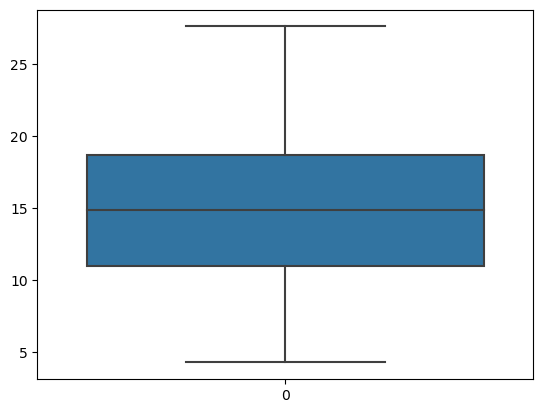

In [15]:
sns.boxplot(data=df['MinTemp'])

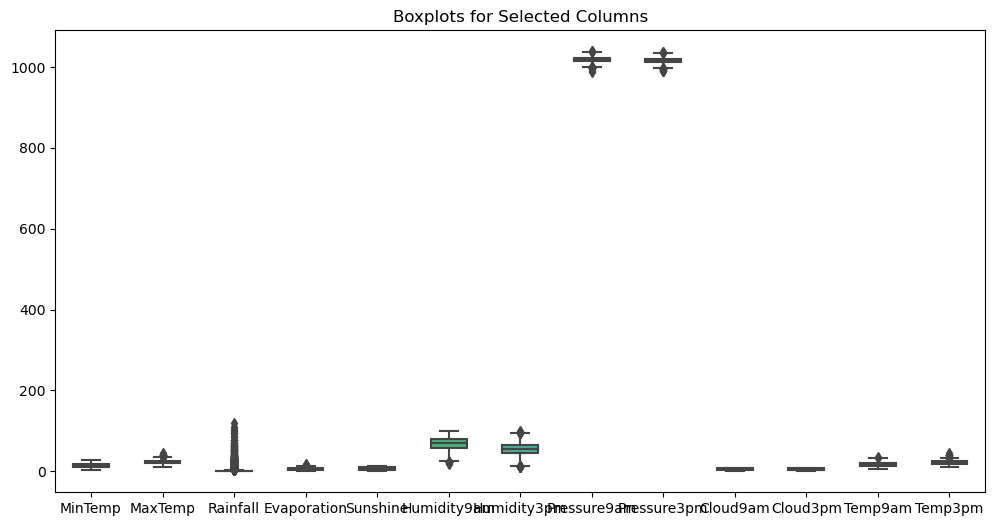

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns], width=0.5)
plt.title('Boxplots for Selected Columns')
plt.show()

Values out of range are outliers

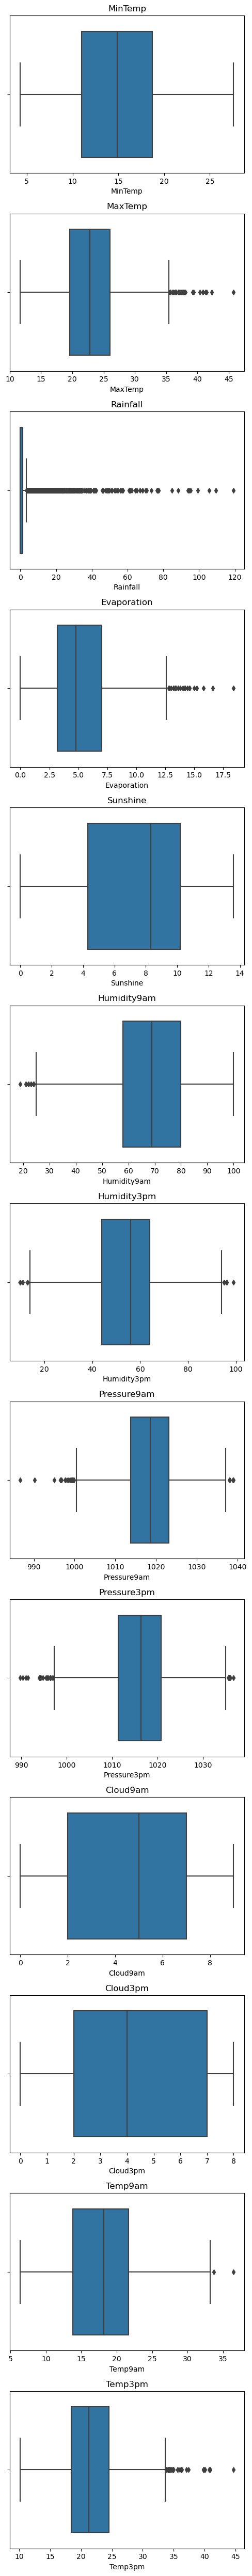

In [17]:
fig, axes = plt.subplots( nrows=len(columns),ncols=1, figsize=(5, 50))
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Treating outliers using truncating or capping

In [18]:
uv1 = np.percentile(df.MaxTemp,[99])[0]
uv1

35.52799999999998

In [19]:
1.05*uv1

37.30439999999998

In [20]:
a=df[df.MaxTemp>uv1]

In [21]:
df['MaxTemp'][(df.MaxTemp>1.125*uv1)] = 1.125*uv1

/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/3067715924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MaxTemp'][(df.MaxTemp>1.125*uv1)] = 1.125*uv1


<Axes: xlabel='MaxTemp'>

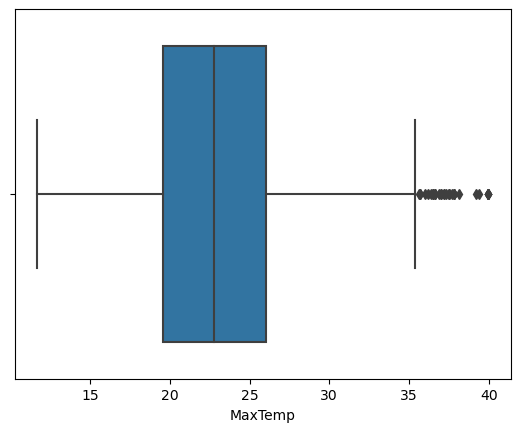

In [22]:
sns.boxplot(df['MaxTemp'],x=df['MaxTemp'])

In [23]:
uv2 = np.percentile(df.Rainfall,[99])[0]
uv2

52.29599999999982

In [24]:
3*uv2

156.88799999999947

In [25]:
df[df.Rainfall>2*uv1]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
633,2009-10-26,Sydney,14.4,17.0,73.2,4.8,0.0,91.0,60.0,1023.7,1025.3,8.0,8.0,14.7,16.6,Yes,Yes
737,2010-02-07,Sydney,20.2,25.0,77.4,7.4,0.2,95.0,86.0,1021.6,1020.8,7.0,8.0,21.1,23.8,Yes,Yes
1140,2011-03-20,Sydney,18.8,23.5,99.4,4.8,3.3,92.0,81.0,1012.4,1010.1,5.0,4.0,19.4,22.2,Yes,Yes
1232,2011-07-20,Sydney,8.7,18.5,76.8,4.8,1.6,91.0,83.0,1012.7,1013.5,5.0,4.0,14.3,15.0,Yes,Yes
1234,2011-07-22,Sydney,11.3,13.9,88.2,4.8,0.0,88.0,95.0,1018.3,1018.0,5.0,4.0,13.1,11.5,Yes,Yes
1464,2012-03-08,Sydney,15.0,21.2,109.4,4.8,2.3,96.0,71.0,1005.4,1005.9,5.0,4.0,15.6,20.1,Yes,Yes
1559,2012-06-11,Sydney,9.9,16.1,76.4,4.2,0.0,96.0,96.0,1022.5,1020.4,5.0,4.0,11.8,13.0,Yes,Yes
1760,2013-01-29,Sydney,19.3,26.2,95.2,4.8,4.5,93.0,71.0,1001.7,1004.9,8.0,6.0,21.5,24.0,Yes,No
2540,2015-04-21,Sydney,14.5,17.7,119.4,4.8,0.0,87.0,96.0,1019.6,1016.8,8.0,8.0,14.9,14.6,Yes,Yes


In [26]:
uv3 = np.percentile(df.Evaporation,[99])[0]
uv3

12.8

In [27]:
1.15*uv3

14.719999999999999

In [28]:
df[df.Evaporation>1.125*uv3]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1098,2011-02-06,Sydney,27.6,35.6,0.0,16.6,2.6,56.0,77.0,1012.7,1016.1,5.0,4.0,28.7,22.8,No,No
1740,2013-01-09,Sydney,21.1,25.0,0.0,18.4,6.1,64.0,44.0,999.3,1002.1,6.0,6.0,22.5,21.7,No,No
1990,2013-10-14,Sydney,13.1,20.7,5.0,15.2,6.7,44.0,34.0,1014.5,1014.4,5.0,2.0,14.8,19.3,Yes,No
2372,2014-11-02,Sydney,13.7,23.5,2.4,15.0,12.9,26.0,23.0,1017.9,1017.9,1.0,1.0,16.8,21.8,Yes,No
2754,2015-11-21,Sydney,20.3,22.1,0.0,14.6,0.3,65.0,56.0,1015.6,1017.3,7.0,7.0,20.8,20.7,No,No
2760,2015-11-27,Sydney,16.5,22.6,0.6,14.6,7.1,54.0,60.0,1016.1,1013.8,7.0,4.0,21.1,21.6,No,No
3113,2016-11-14,Sydney,17.4,24.4,0.0,15.8,7.0,40.0,52.0,1002.0,1004.5,3.0,7.0,20.5,20.3,No,No


In [29]:
df.Evaporation[(df.Evaporation>1.125*uv3)]=1.125*uv3

/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/3751812484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation[(df.Evaporation>1.125*uv3)]=1.125*uv3


<Axes: xlabel='Evaporation'>

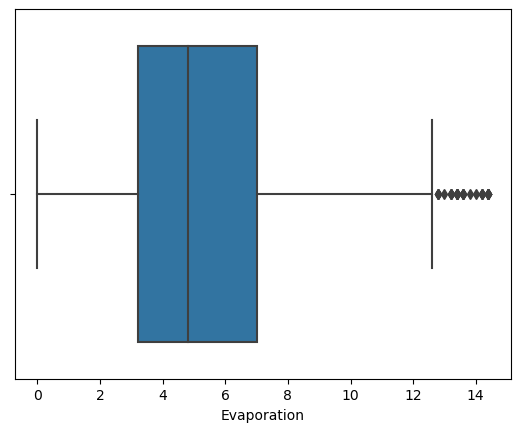

In [30]:
sns.boxplot(df.Evaporation,x=df.Evaporation)

In [31]:
lv4=np.percentile(df.Humidity9am,[1])[0]
lv4

30.0

In [32]:
df[df.Humidity9am<0.85*lv4]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
590,2009-09-13,Sydney,17.3,32.2,0.0,8.2,10.9,24.0,17.0,1019.6,1015.5,0.0,0.0,25.2,31.9,No,No
603,2009-09-26,Sydney,17.1,19.6,0.0,11.2,9.0,24.0,19.0,1004.3,1004.5,1.0,3.0,17.7,18.4,No,No
608,2009-10-01,Sydney,14.9,33.1,0.0,7.0,10.8,21.0,10.0,1013.4,1007.7,3.0,1.0,25.6,32.8,No,No
1647,2012-09-07,Sydney,16.4,21.7,0.0,10.8,8.7,22.0,22.0,1005.8,1006.2,0.0,5.0,21.3,18.4,No,No
1675,2012-10-05,Sydney,20.0,34.2,0.0,10.8,10.3,22.0,59.0,1014.0,1013.0,0.0,5.0,27.9,22.8,No,No
1956,2013-09-10,Sydney,20.1,31.6,0.0,7.4,9.7,24.0,14.0,1005.5,1000.4,2.0,4.0,25.9,30.6,No,No
1986,2013-10-10,Sydney,17.6,37.3,0.0,10.0,10.0,22.0,10.0,1009.7,1003.1,7.0,1.0,27.3,37.1,No,No
1993,2013-10-17,Sydney,19.6,33.6,0.0,11.2,5.2,23.0,10.0,1005.9,1003.3,7.0,7.0,27.5,31.5,No,No
2341,2014-10-01,Sydney,15.6,22.1,0.0,12.0,11.3,19.0,28.0,1017.7,1018.5,1.0,1.0,18.2,19.6,No,No
3099,2016-10-31,Sydney,16.1,23.3,1.6,6.6,12.9,24.0,28.0,1011.0,1010.8,1.0,1.0,18.3,21.7,Yes,No


In [33]:
df.Humidity9am[(df.Humidity9am<0.85*lv4)]=0.85*lv4

/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/1395461306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity9am[(df.Humidity9am<0.85*lv4)]=0.85*lv4


<Axes: xlabel='Humidity9am'>

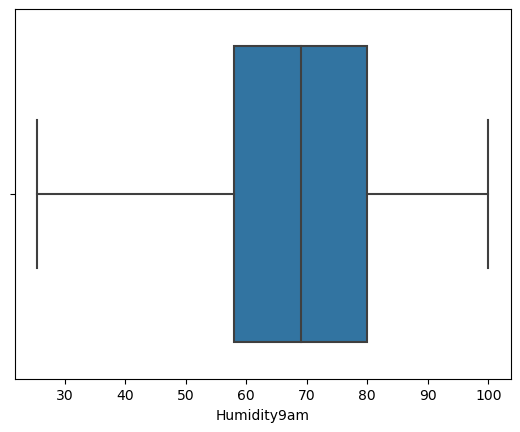

In [34]:
sns.boxplot(df,x=df.Humidity9am)

In [35]:
uv5=np.percentile(df.Humidity3pm,[99])[0]
lv5=np.percentile(df.Humidity3pm,[1])[0]
print(uv5,lv5)

92.0 18.0


In [36]:
print(1.035*uv5,0.85*lv5)

95.22 15.299999999999999


In [37]:
df.Humidity3pm[(df.Humidity3pm>1.03*uv5)]=1.03*uv5
df.Humidity3pm[(df.Humidity3pm<0.85*lv5)]=0.85*lv5

/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/3482630518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity3pm[(df.Humidity3pm>1.03*uv5)]=1.03*uv5
/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/3482630518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity3pm[(df.Humidity3pm<0.85*lv5)]=0.85*lv5


<Axes: xlabel='Humidity3pm'>

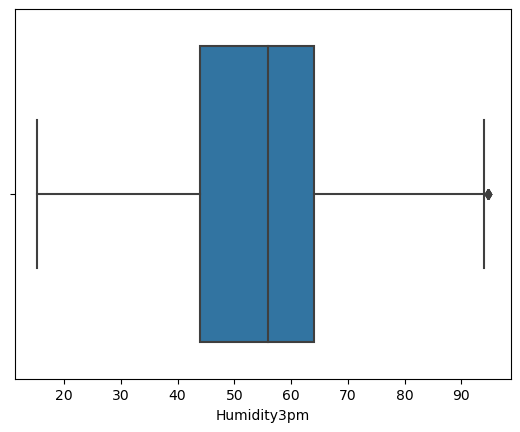

In [38]:
sns.boxplot(df,x=df.Humidity3pm)

In [39]:
lv6=np.percentile(df.Pressure9am,[1])[0]
uv6=np.percentile(df.Pressure9am,[99])[0]
print(lv6,uv6)

1001.572 1033.856


In [40]:
print(0.95*lv6,1.02*uv6)

951.4934 1054.53312


In [41]:
lv7=np.percentile(df.Pressure3pm,[1])[0]
uv7=np.percentile(df.Pressure3pm,[99])[0]
print(lv7,uv7)

998.972 1031.664


In [42]:
uv8=np.percentile(df.Temp9am,[99])[0]
uv8

27.863999999999987

In [43]:
1.25*uv8

34.829999999999984

In [44]:
df.Temp9am[(df.Temp9am>1.25*uv8)] = 1.25*uv8

/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/2283682030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temp9am[(df.Temp9am>1.25*uv8)] = 1.25*uv8


<Axes: xlabel='Temp9am'>

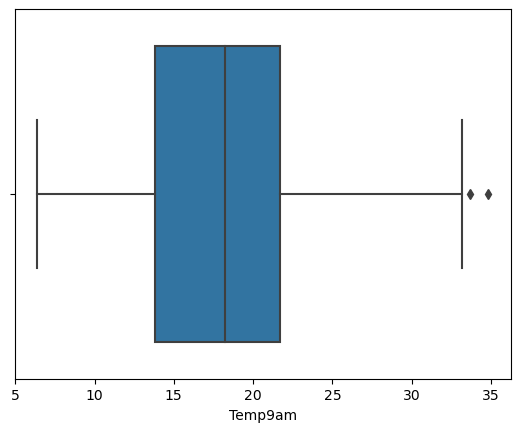

In [45]:
sns.boxplot(df,x=df.Temp9am)

In [46]:
uv9=np.percentile(df.Temp3pm,[99])[0]
uv9

32.76399999999999

In [47]:
1.05*uv9

34.402199999999986

In [48]:
df.Temp3pm[(df.Temp3pm>1.05*uv9)] = 1.05*uv9

/var/folders/b6/n1hlrvw92pq2f_954j93qj2w0000gn/T/ipykernel_90946/1427573991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temp3pm[(df.Temp3pm>1.05*uv9)] = 1.05*uv9


<Axes: xlabel='Temp3pm'>

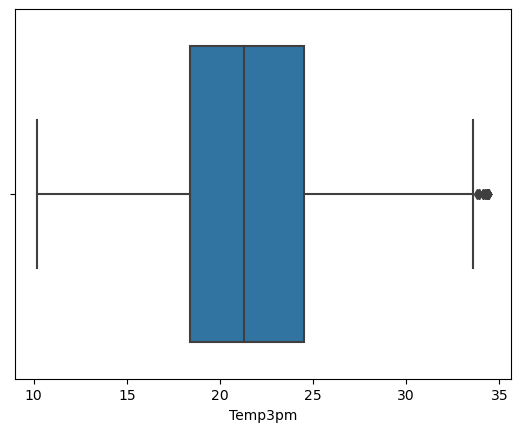

In [49]:
sns.boxplot(df,x=df.Temp3pm)

### Creating dummies to change categorical to numerical variables 

In [50]:
df=pd.get_dummies(df,columns=['RainToday','RainTomorrow'],drop_first=True,dtype=int)

In [51]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


### Deleting date and location columns as they do not affect the output 

In [52]:
df = df.drop(['Date','Location'],axis=1)

In [53]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


Dividing columns into input and output variables

In [54]:
x = df.loc[:,df.columns!='RainTomorrow_Yes']
y=df['RainTomorrow_Yes']

In [55]:
print(x.shape,y.shape)

(3337, 14) (3337,)


### Dividing data into train and test data set 

80 percent of data is used for training the model and 20 percent data is used to test the trained model

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [58]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


In [59]:
import statsmodels.api as sn

## Logistic Regression 

Logistic Regression is a binary classification algorithm that models the probability of an instance belonging to a particular class, utilizing a logistic function to map input features to a predicted probability. It's widely used for its simplicity, interpretability, and effectiveness in various applications.

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
import statsmodels.discrete.discrete_model as sm

In [62]:
lr = LogisticRegression()
lr.fit(x,y)

/Users/tejarishitha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
print(lr.coef_)
print(lr.intercept_)

[[-0.11253315  0.09270874  0.0286835   0.04476794 -0.21780823  0.0129102
   0.05072597 -0.08662992  0.08213487 -0.08125729  0.16075105  0.05730598
  -0.04718645  0.08395196]]
[0.00101456]


In [64]:
x_cos = sn.add_constant(x)

In [65]:
logt = sm.Logit(y,x_cos).fit()
logt.summary()

Optimization terminated successfully.
         Current function value: 0.381220
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           14
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.3338
Time:                        13:49:22   Log-Likelihood:                -1272.1
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                1.408e-263
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.1099      8.551      3.521      0.000      13.350      46.870
MinTemp          -0.2397      0.048     -4.965      0.000      -0.334      -0.145
MaxTemp           0.0894      0.043      2.097      0.036       0.006       0.173
Rainfall          0.0098      0.006      1.523      0.128      -0.003       0.023
Evaporation       0.0640      0.026      2.488      0.013       0.014       0.114
Sunshine         -0.2315      0.023    -10.112      0.000      -0.276      -0.187
Humidity9am       0.0142      0.007      2.048      0.041       0.001       0.028
Humidity3pm       0.0513      0.007      7.514      0.000       0.038       0.065
Pressure9am      -0.1174      0.031     -3.792      0.000      -0.178      -0.057
Pressure3pm       0.0835      0.030      2.797      0.005       0.025       0.142
Cloud9am         -0.0796      0.031     -2.591      0.010      -0.140      -0.019
Cloud3pm          0.1370      0.031      4.457      0.000       0.077       0.197
Temp9am           0.1412      0.051      2.745      0.006       0.040       0.242
Temp3pm          -0.0371      0.051     -0.733      0.464      -0.136       0.062
RainToday_Yes     0.7243      0.136      5.321      0.000       0.458       0.991
=================================================================================
"""

In [66]:
lr.predict_proba(x)

array([[0.08421645, 0.91578355],
       [0.3217237 , 0.6782763 ],
       [0.11740201, 0.88259799],
       ...,
       [0.68530036, 0.31469964],
       [0.97885735, 0.02114265],
       [0.97082662, 0.02917338]])

In [67]:
y_pred = lr.predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [68]:
y_pred_3 = (lr.predict_proba(x)[:,1]>=0.45)
y_pred_3

array([ True,  True,  True, ..., False, False, False])

Accuracy of our logistic model

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score

A confusion matrix is a table used in classification to evaluate the performance of a model. It shows the counts of true positive, true negative, false positive, and false negative predictions, providing insights into the model's accuracy, precision, recall, and overall effectiveness.

In [70]:
confusion_matrix(y,y_pred)

array([[2285,  187],
       [ 379,  486]])

In [71]:
confusion_matrix(y,y_pred_3)

array([[2229,  243],
       [ 344,  521]])

In [72]:
accuracy_score(y,y_pred)

0.8303865747677555

In [73]:
accuracy_score(y,y_pred_3)

0.8240934971531315

## LDA 

It is a dimensionality reduction technique used for feature extraction in pattern classification. It aims to find a linear combination of features that characterizes or separates two or more classes, maximizing the ratio of between-class variance to within-class variance.

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [76]:
y_train_pred = lda.predict(x_train)
y_test_pred = lda.predict(x_test)

In [77]:
confusion_matrix(y_test,y_test_pred)

array([[470,  40],
       [ 70,  88]])

In [78]:
accuracy_score(y_train,y_train_pred)

0.8310228550018733

In [79]:
accuracy_score(y_test,y_test_pred)

0.8353293413173652

In [80]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s= scaler.transform(x_train)

In [81]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s= scaler.transform(x_test)

In [82]:
lda1=LinearDiscriminantAnalysis()
lda1.fit(x_train_s,y_train)

LinearDiscriminantAnalysis()

In [83]:
confusion_matrix(y_test,lda1.predict(x_test_s))

array([[461,  49],
       [ 64,  94]])

In [84]:
accuracy_score(y_test,lda1.predict(x_test_s))

0.8308383233532934

## KNN 

It is a supervised machine learning algorithm used for classification and regression. It predicts the class of a data point by considering the majority class among its k-nearest neighbors in the feature space.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_s,y_train)


KNeighborsClassifier()

In [86]:
confusion_matrix(y_test,knn.predict(x_test_s))

array([[468,  42],
       [ 80,  78]])

In [87]:
accuracy_score(y_test,knn.predict(x_test_s))

0.8173652694610778

GridSearchCV is a technique for hyperparameter tuning in machine learning that systematically searches through a predefined hyperparameter grid to find the optimal combination for a model, enhancing its performance.

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,13, 15, 20, 25, 30]}

Taking KNN model as base estimator 

In [90]:
gs_cv=GridSearchCV(estimator = KNeighborsClassifier(),param_grid=params)
gs_cv.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15,
                                         20, 25, 30]})

In [91]:
gs_cv.best_params_


{'n_neighbors': 15}

In [92]:
confusion_matrix(y_test,gs_cv.predict(x_test_s))

array([[480,  30],
       [ 79,  79]])

In [93]:
accuracy_score(y_test,gs_cv.predict(x_test_s))

0.8368263473053892

In [94]:
accuracy_score(y_train,gs_cv.predict(x_train_s))

0.8433870363431997

## ClassificationTree 

A classification tree is a machine learning model that recursively splits the dataset based on features to create a hierarchical structure, enabling the classification of instances into distinct classes.

In [95]:
type(x_train)

pandas.core.frame.DataFrame

In [96]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 4)
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [97]:
confusion_matrix(y_test,clftree.predict(x_test))

array([[484,  26],
       [ 85,  73]])

In [98]:
accuracy_score(y_test,clftree.predict(x_test))

0.8338323353293413

In [99]:
accuracy_score(y_train,clftree.predict(x_train))

0.8400149868864744

In [100]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

In [101]:
from IPython.display import Image
import pydotplus

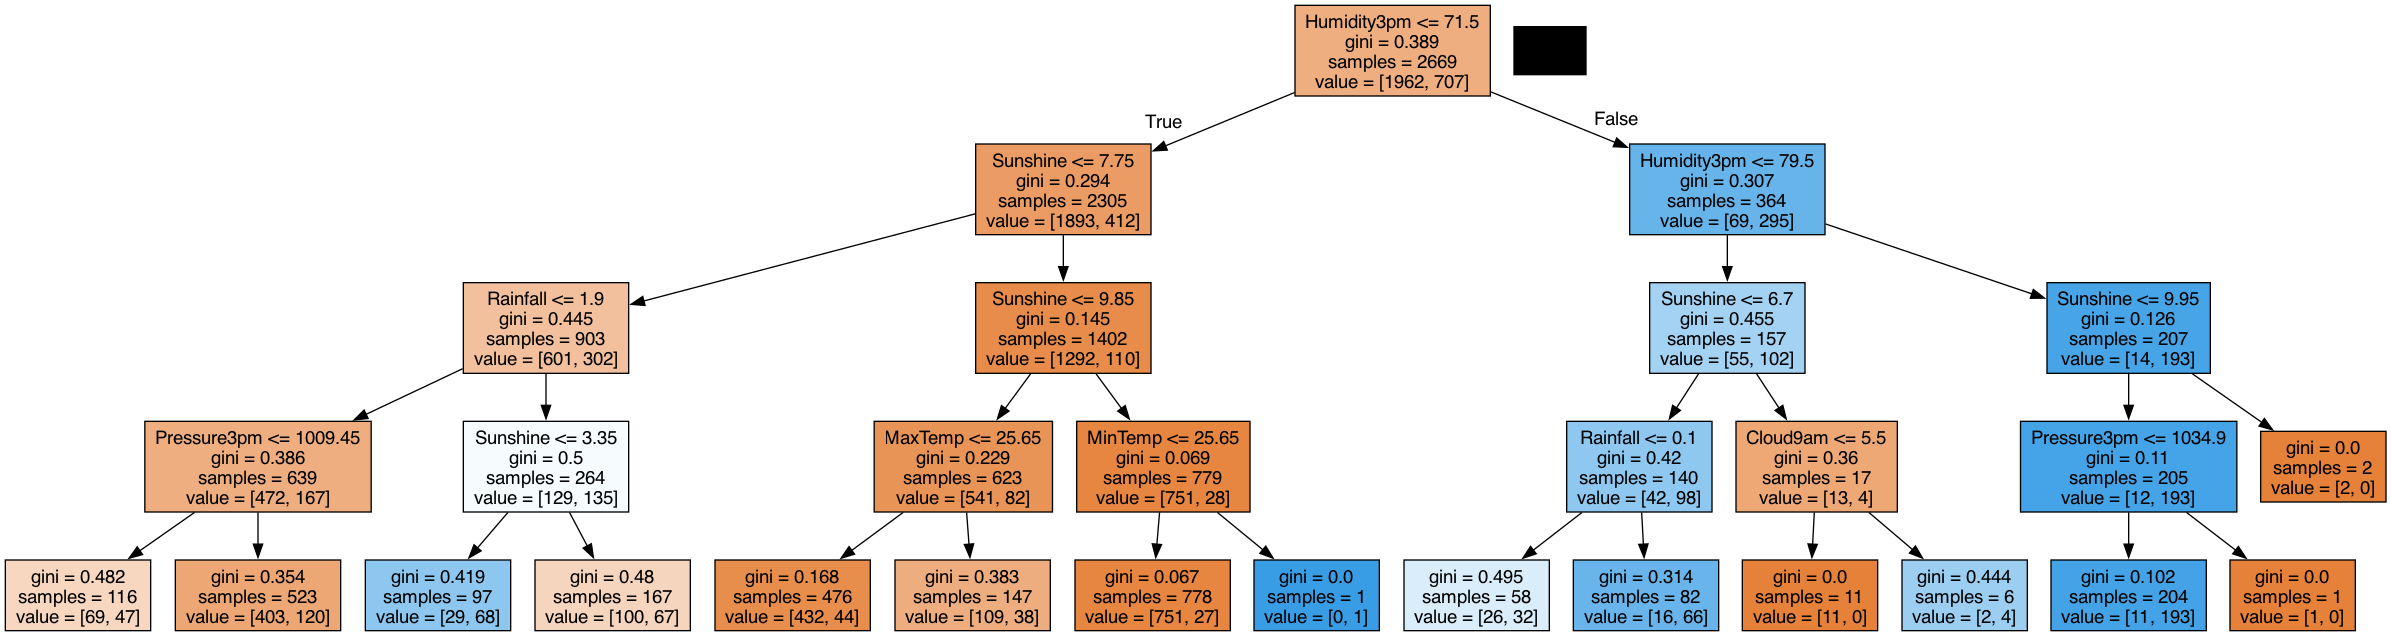

In [102]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

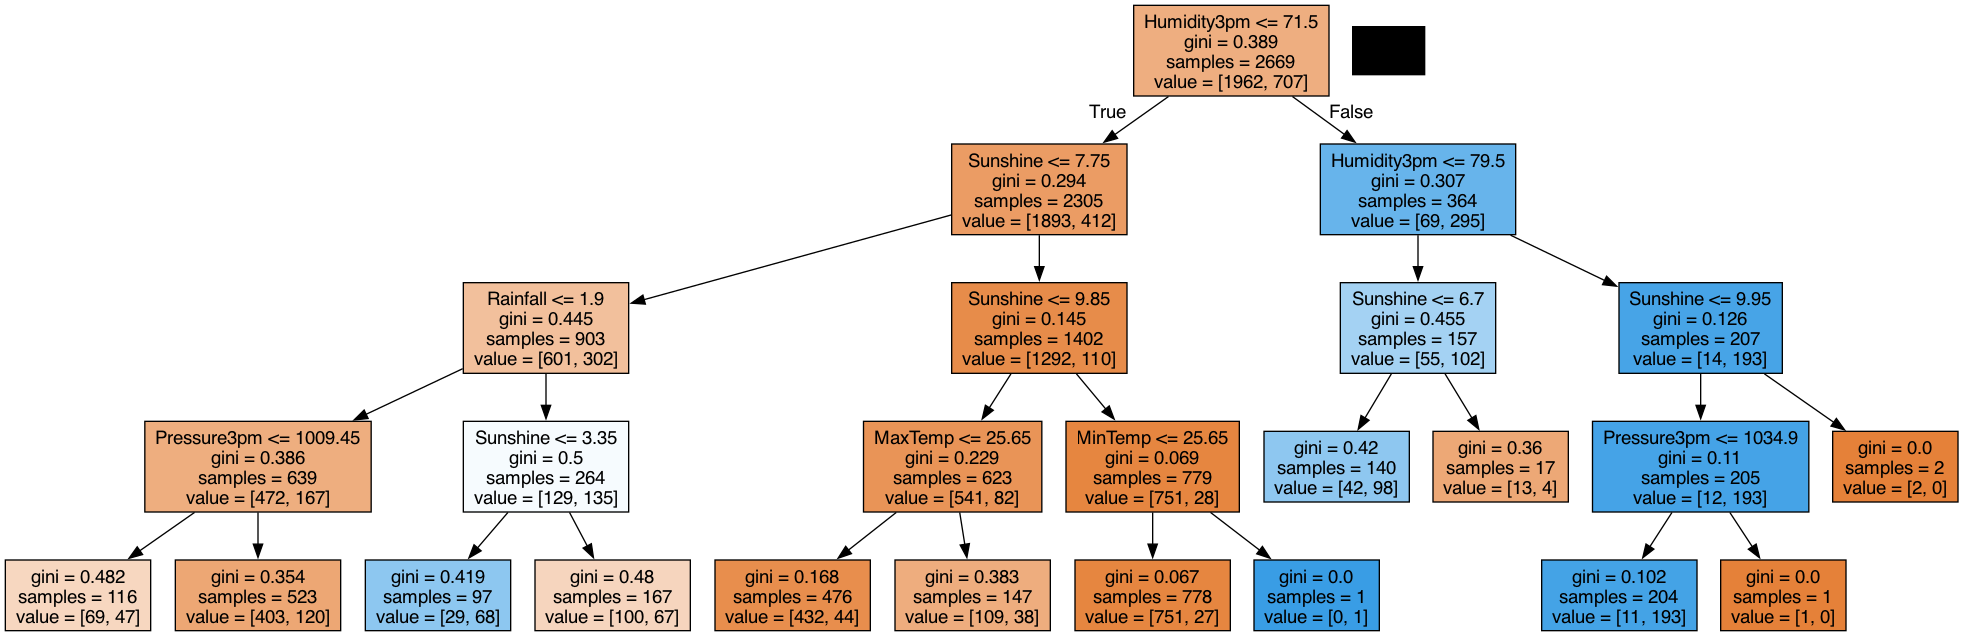

In [103]:
clftree2 = tree.DecisionTreeClassifier(min_samples_split =150, max_depth=4)
clftree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [104]:
accuracy_score(y_test, clftree2.predict(x_test))

0.8353293413173652

In [105]:
clftree3 = tree.DecisionTreeClassifier()
clftree3.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
params_grid = {"min_samples_split": [100,130,150,170,190,200],
               "max_depth":[1,2,3,4,5,6,7,8,9,10]
              }

In [107]:
gs_tree=GridSearchCV(clftree2,params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [108]:
gs_tree.fit(x_train,y_train)
gs_tree.best_params_

{'max_depth': 4, 'min_samples_split': 100}

In [109]:
confusion_matrix(y_test,gs_tree.predict(x_test))

array([[486,  24],
       [ 86,  72]])

In [110]:
accuracy_score(y_test,gs_tree.predict(x_test))

0.8353293413173652

### Bagging 

A Bagging Classifier is an ensemble machine learning technique that combines multiple base classifiers, often decision trees, to improve overall accuracy and robustness by averaging their predictions.

In [111]:
from sklearn.ensemble import BaggingClassifier

In [112]:
bag_clf= BaggingClassifier(base_estimator=clftree2, n_estimators=1000,bootstrap=True, n_jobs=-1,random_state=42)

In [113]:
bag_clf.fit(x_train, y_train)

/Users/tejarishitha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_split=150),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [114]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[485,  25],
       [ 81,  77]])

In [115]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.8413173652694611

## Random Forest Classifier 

Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification, offering high accuracy and resilience to overfitting.

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [222]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [223]:
confusion_matrix(y_test, rf.predict(x_test))

array([[485,  25],
       [ 77,  81]])

In [224]:
accuracy_score(y_test, rf.predict(x_test))

0.8473053892215568

In [129]:
rf1=RandomForestClassifier(n_estimators=500)
rf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [130]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
               
               "max_depth":[3,4,5,6,7,8,],
              }

In [131]:
gs_rf = GridSearchCV(rf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [132]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [134]:
cvrf = gs_rf.best_estimator_
cvrf

RandomForestClassifier(max_depth=5, max_features=9, min_samples_split=10,
                       n_estimators=1000, n_jobs=-1, random_state=42)

In [135]:
confusion_matrix(y_test,gs_rf.predict(x_test))

array([[485,  25],
       [ 83,  75]])

In [136]:
accuracy_score(y_test,gs_rf.predict(x_test))

0.8383233532934131

In [137]:
gs_rf1 = GridSearchCV(rf1, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [139]:
gs_rf1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [140]:
cvrf1 = gs_rf1.best_estimator_
cvrf1

RandomForestClassifier(max_depth=5, max_features=9, n_estimators=500)

In [141]:
confusion_matrix(y_test,gs_rf1.predict(x_test))

array([[484,  26],
       [ 83,  75]])

In [143]:
accuracy_score(y_test,gs_rf1.predict(x_test))

0.8368263473053892

In [144]:
accuracy_score(y_train,gs_rf1.predict(x_train))

0.8531285125515174

## Gradient Boosting

Gradient Boosting Classifier is an ensemble learning method that builds a series of weak learners (usually decision trees) sequentially, with each tree correcting the errors of the previous ones, resulting in a powerful and accurate predictive model.

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [148]:
confusion_matrix(y_test, gbc_clf.predict(x_test))

array([[483,  27],
       [ 78,  80]])

In [149]:
accuracy_score(y_test, gbc_clf.predict(x_test))

0.842814371257485

In [168]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.15, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=1, n_estimators=1000)

In [175]:
confusion_matrix(y_test, gbc_clf2.predict(x_test))

array([[482,  28],
       [ 73,  85]])

In [176]:
accuracy_score(y_train, gbc_clf2.predict(x_train))

0.8666167103784189

In [170]:
accuracy_score(y_test, gbc_clf2.predict(x_test))

0.8488023952095808

## ADA Boost 

AdaBoost Classifier is an ensemble learning method that combines multiple weak classifiers to create a strong classifier by assigning higher weights to misclassified instances, boosting their importance in the model.

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [201]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02,n_estimators = 3500)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=3500)

In [202]:
accuracy_score(y_train, ada_clf.predict(x_train))

0.8501311352566504

In [204]:
accuracy_score(y_test, ada_clf.predict(x_test))

0.844311377245509

In [229]:
ada_clf2 = AdaBoostClassifier(rf,learning_rate =0.05, n_estimators =1000)

In [230]:
ada_clf2.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=1000)

In [235]:
accuracy_score(y_test, ada_clf2.predict(x_test))

0.8383233532934131

## XG Boost 

XGBoost Classifier is an efficient and scalable implementation of gradient boosting that enhances predictive performance by employing regularization, tree pruning, and parallel processing, making it a popular choice in machine learning competitions.

In [236]:
import xgboost as xgb

In [237]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [238]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [239]:
confusion_matrix(y_test, xgb_clf.predict(x_test))

array([[472,  38],
       [ 75,  83]])

In [240]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.8308383233532934

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

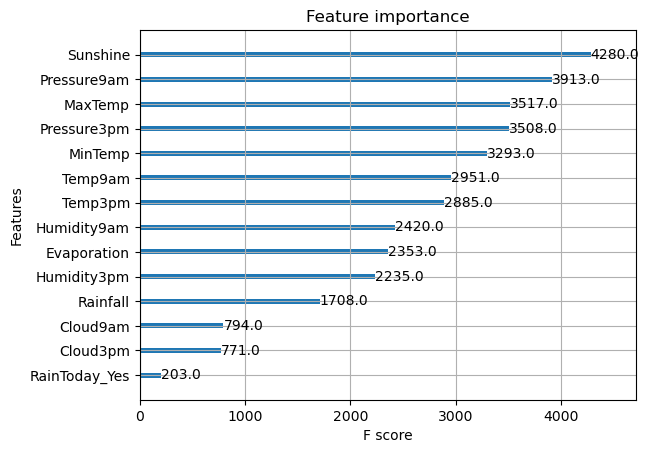

In [241]:
xgb.plot_importance(xgb_clf)

In [261]:
xgb_clf1 = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [262]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [263]:
grid_search = GridSearchCV(xgb_clf1, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [264]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [265]:
cvxg_clf = grid_search.best_estimator_

In [266]:
accuracy_score(y_test, cvxg_clf.predict(x_test))

0.8532934131736527

In [267]:
accuracy_score(y_train, cvxg_clf.predict(x_train))

0.9022105657549644

In [268]:
confusion_matrix(y_test, cvxg_clf.predict(x_test))

array([[487,  23],
       [ 75,  83]])

In [269]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.8}

## 1. Your views about the problem statement? 

The problem statement for developing machine learning models to predict rainfall using various distribution models is important and common in many fields such as climate and agriculture. It has significant implications for planning and decision-making in agriculture, water management and disaster preparedness. The mathematical and categorical properties involved in this problem make them suitable for the search for various classification algorithms. Classification model selection, hyperparameter tuning, and architecture are important for developing accurate and robust predictive models. In general, problem statement enables the effective and efficient application of machine learning to solve real-world problems.

## 2. What will be your approach to solving this task?

My approach to solving the task of rainfall forecasting using various classification models will include the following steps:

1. Data Analysis and Actions:
- Understand the dataset, check the distribution of features, and identify missing or negative features.
- Handle missing data by assignment or deletion and encode categorical variables appropriately.

2. Feature Engineering:
- Extract relevant features from data and possibly create new features based on domain knowledge.
- Standardize or normalize the number of features to ensure correct scaling of the model. 

3. Model selection:
- Logistic regression, random forest, gradient boosting, support vector machine etc. Choose various classification models appropriate to the problem, such as.
- Consider integration to improve forecast performance. 

4. Hyperparameter Tuning:
- Use techniques such as grid search or random search to find the best hyperparameters for each selected model.
- Optimize metrics like accuracy, precision and recall.

5. Training and evaluation:
- Train and test the dataset to train and evaluate the model.
- Use cross-validation to measure model performance.

6. Model Comparison and Interpretability:
- Compare the performance of different models based on test results.
- A translation model is important, especially when the goal is to provide better understanding to stakeholders.

All processes, a good understanding of the field, collaboration with field experts and continuous evaluation are essential for the development of useful and reliable rain gauge models.

## 3. What were the available ML model options you had to perform this task? 

There are various machine learning models suitable for performing the task of predicting rainfall. Here are some common classification models that could be considered:

1. Logistic Regression: 
- Simple and interpretable model for binary classification.

2. Decision Trees: 
- Able to capture non-linear relationships in data and easy to interpret.

3. Random Forest: 
- Ensemble model that combines multiple decision trees, offering improved accuracy and robustness.

4. Gradient Boosting (e.g., XGBoost, LightGBM): 
- Ensemble method that builds trees sequentially, correcting errors of previous ones for higher predictive performance.

5. K-Nearest Neighbors (KNN): 
- Utilizes proximity of data points for classification, simple yet effective.

6. Adaboost: 
- An integrated algorithm that combines weak classifiers to give more weight to false examples. 

7. XGBoost: 
- Optimization of gradient boosting, widely used for structured/tabular data and known for its speed and efficiency.

Each model has advantages and disadvantages, and the choice depends on factors such as data size, need for interpretation, correlation and quality of predictions with precipitation characteristics. Combinations like Random Forest, Gradient Boosting, and XGBoost often work well in practice

## 4. Which model’s performance is best and what could be the possible reason for that?

Among the models XG Boost Classifier has the high accuracy of 85.33.Some reasons are ,XGBoost (Extreme Gradient Boosting) classifier is an effective and efficient gradient boosting algorithm designed to increase speed and performance. XGBoost is an ensemble learning method that allows weak learners (typically decision trees) to build a robust predictive model by correcting past errors. It also includes cutting down trees during the course to improve the model's ability. XGBoost is designed for parallel and distributed computing, making it scalable and able to handle large files. XGBoost builds decision trees sequentially, and the purpose of each tree is to correct the mistakes of the previous tree. Trees are pruned to maintain their depth and prevent excessive settling. Other models such as Random Forest (84.73) and Gradient Boosting (84.88) have good accuracy.

## 5. What steps can you take to improve this selected model’s performance even further?

To improve the performance of the XGBoost model in precipitation prediction and to solve the problem more accurately. Consider creating an ensemble of multiple XGBoost models with different configurations to leverage different sources, or combining different model types (for example, combining XGBoost with a random forest). Explore more ideas and more machine learning models for this project. If so, consider including other important data that may provide additional information to improve forecast accuracy. Make sure the input data is clean, normalized, and normalized to the standard. Experimenting with these techniques, keeping in mind the unique characteristics of the data and the problem at hand, can improve the performance of your XGBoost models.

Outliers are not removed in some variables, removing them may increase accuracy.